In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
#from math import ceil
#from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
#from sklearn.cluster import KMeans
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [146]:
df = pd.read_csv('../../data/dataset.csv')
df['fico_avg'] = df['fico_range'].str.split('-').apply(
    lambda x: sum([int(val) for val in x])/len(x)
    )
# df['invested'] = (df['amount_funded_by_investors'] > 0).astype(int)

In [148]:
def plot_residuals(y_pred, residuals, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.6) 
    plt.axhline(0, color='red', linestyle='--') 
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.savefig(f'../../img/{filename}-res.png')
    plt.show()

In [149]:
def plot_actual_vs_predicted(
    y_true,
    y_pred,
    y_label,
    scatter_color,
    line_color,
    filename
) -> None:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, color=scatter_color, label="Predictions")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color=line_color, label="Ideal")
    plt.xlabel(f"Actual {y_label}")
    plt.ylabel(f"Predicted {y_label}")
    plt.title(f"Actual {y_label} vs Predicted {y_label}")
    plt.legend()
    plt.grid(True)
    plt.savefig(f'../../img/{filename}-preds.png')
    plt.show()

In [150]:
def plot_pipeline(X: pd.DataFrame, y: pd.DataFrame, y_value: str, filename):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
    numeric_transformer = Pipeline(steps=[
        ("scaler", MinMaxScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, X.columns)
    ])

    model_pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", LinearRegression())
    ])
    model_pipeline.fit(X_train, y_train)
    score = model_pipeline.score(X_test, y_test)
    print(f"Test R^2 Score: {score:.4f}")
    y_pred = model_pipeline.predict(X_test)
    residuals = y_test - y_pred
    plot_residuals(y_pred, residuals, filename)
    plot_actual_vs_predicted(y_test, y_pred, y_value, 'green', 'red', filename)
    X = sm.add_constant(X)
    lin_model = LinearRegression()
    ols_model = sm.OLS(y, X).fit()
    print(ols_model.conf_int())
    print(ols_model.summary())

In [151]:
df.columns

Index(['interest_rate', 'fico_range', 'amount_requested',
       'amount_funded_by_investors', 'loan_length', 'fico_avg'],
      dtype='object')

Test R^2 Score: 0.7272


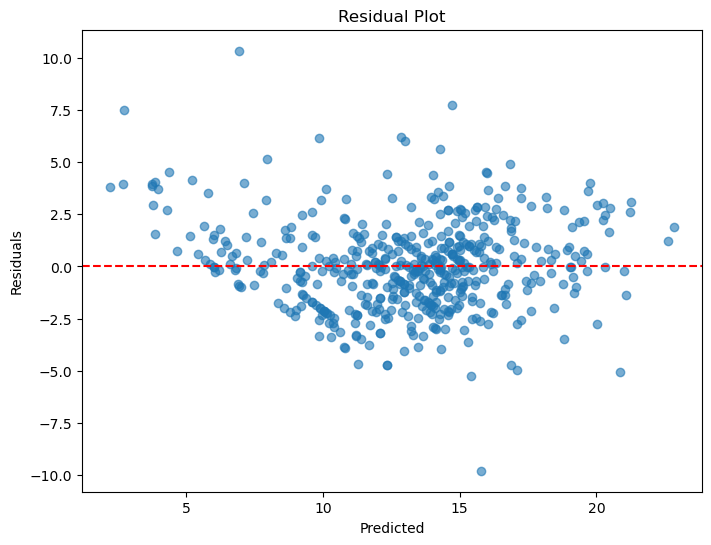

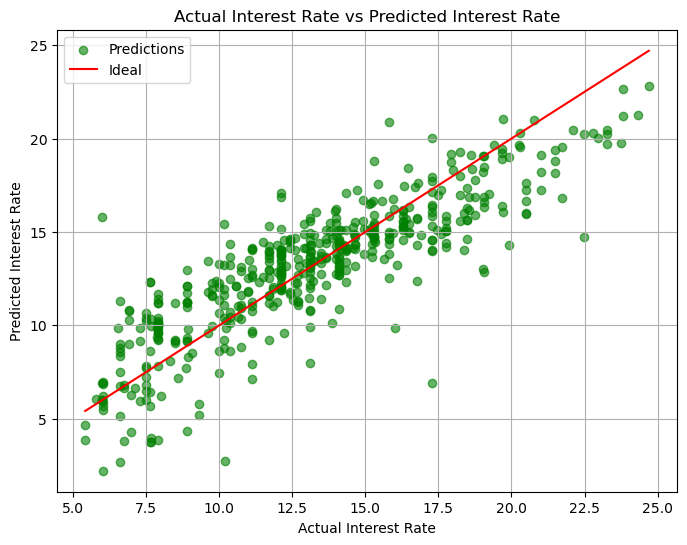

                          0          1
const             66.084798  69.514667
amount_requested   0.000127   0.000150
loan_length        0.128050   0.146356
fico_avg          -0.090119  -0.085368
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     2431.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:07:43   Log-Likelihood:                -5408.1
No. Observations:                2498   AIC:                         1.082e+04
Df Residuals:                    2494   BIC:                         1.085e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
               

In [152]:
X1 = df.drop(columns=['fico_range', 'interest_rate', 'amount_funded_by_investors'])
y1 = df['interest_rate']
plot_pipeline(X1, y1, 'Interest Rate', 'Interest_Rate')


Test R^2 Score: 0.6585


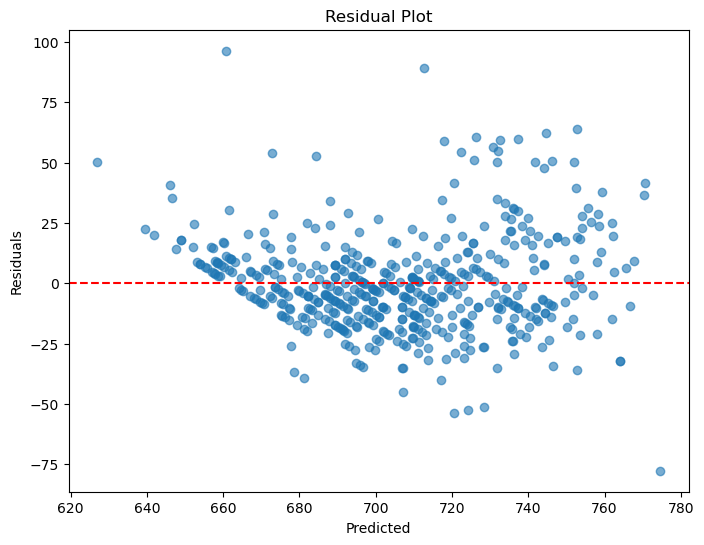

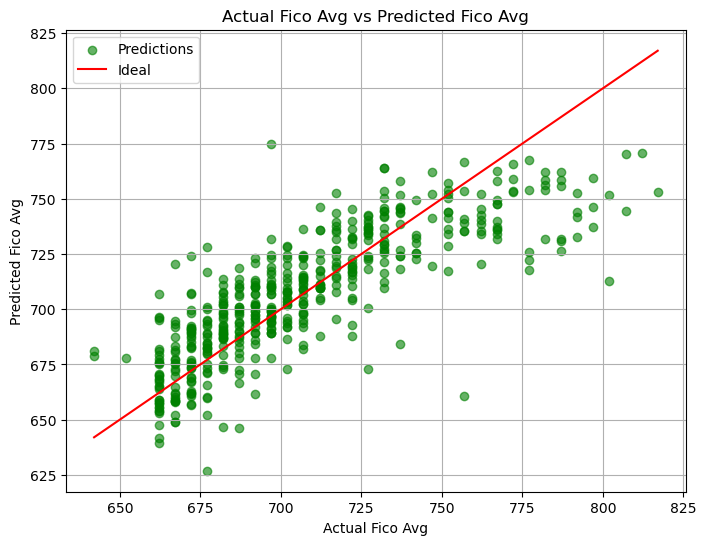

                                       0           1
const                       7.479382e+02  755.013601
interest_rate              -7.946584e+00   -7.527841
amount_requested            4.013656e-04    0.001221
amount_funded_by_investors  4.099368e-07    0.000825
loan_length                 9.385444e-01    1.120590
                            OLS Regression Results                            
Dep. Variable:               fico_avg   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1329.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:08:37   Log-Likelihood:                -10999.
No. Observations:                2498   AIC:                         2.201e+04
Df Residuals:                    2493   BIC:                         2.204e+04
Df Model:                           4             

In [153]:
X = df.drop(columns=['fico_range', 'fico_avg'])
y = df['fico_avg']
plot_pipeline(X, y, 'Fico Avg', 'Fico_Avg')


In [130]:
X.columns

Index(['interest_rate', 'amount_requested', 'amount_funded_by_investors',
       'loan_length', 'invested'],
      dtype='object')

In [131]:
df = pd.read_csv('../../data/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [132]:
df.sample(10)

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
2319,13.99,670-674,8000.0,8000.00,36.0
1559,9.76,695-699,5000.0,5000.00,36.0
363,22.78,690-694,30000.0,30000.00,60.0
2299,12.12,690-694,8400.0,8400.00,36.0
2218,11.36,705-709,8000.0,7989.96,36.0
1044,14.72,670-674,7000.0,7000.00,36.0
1043,5.99,765-769,9800.0,9775.00,36.0
1558,13.11,680-684,10000.0,10000.00,36.0
714,13.11,670-674,18000.0,18000.00,36.0
2179,14.96,760-764,6000.0,6000.00,36.0


In [133]:
df.isnull().sum()

interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

In [134]:
df.describe()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length
count,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012
std,4.178007,7801.222483,7743.387861,9.933753
min,5.420000,1000.000000,-0.010000,36.000000
25%,10.160000,6000.000000,6000.000000,36.000000
50%,13.110000,10000.000000,10000.000000,36.000000
75%,15.800000,17000.000000,16000.000000,36.000000
max,24.890000,35000.000000,35000.000000,60.000000


In [135]:
encoder = LabelEncoder()
df['fico_range'] = encoder.fit_transform(df['fico_range'])

NameError: name 'LabelEncoder' is not defined

In [ ]:
df.groupby('amount_funded_by_investors').describe()

interest_rate                                       \
                                   count       mean       std    min      25%   
amount_funded_by_investors                                                      
-0.01                                2.0  13.080000  1.117229  12.29  12.6850   
 0.00                                4.0  10.145000  2.498913   7.68   8.3925   
 200.00                              1.0   7.750000       NaN   7.75   7.7500   
 214.02                              1.0   8.000000       NaN   8.00   8.0000   
 224.99                              1.0  13.170000       NaN  13.17  13.1700   
...                                  ...        ...       ...    ...      ...   
 34900.00                            1.0  18.250000       NaN  18.25  18.2500   
 34950.00                            6.0  17.976667  6.139364   8.90  13.8275   
 34975.00                            5.0  12.946000  5.736060   7.90   8.9000   
 34977.35                            1.0  21.670000       NaN  21.67  21.6700   
 35000.00                           31.0  16.867419  4.555892   7.90  13.8800   

                                                  amount_requested           \
                              50%      75%    max            count     mean   
amount_funded_by_investors                                                    
-0.01                       13.08  13.4750  13.87              2.0   4850.0   
 0.00                        9.83  11.5825  13.24              4.0   5025.0   
 200.00                      7.75   7.7500   7.75              1.0   5400.0   
 214.02                      8.00   8.0000   8.00              1.0   7500.0   
 224.99                     13.17  13.1700  13.17              1.0   7500.0   
...                           ...      ...    ...              ...      ...   
 34900.00                   18.25  18.2500  18.25              1.0  35000.0   
 34950.00                   19.62  22.9525  23.76              6.0  35000.0   
 34975.00                   10.16  16.4900  21.28              5.0  35000.0   
 34977.35                   21.67  21.6700  21.67              1.0  35000.0   
 35000.00                   17.58  20.4900  24.70             31.0  35000.0   

                            ... loan_length       fico_avg              \
                            ...         75%   max    count        mean   
amount_funded_by_investors  ...                                          
-0.01                       ...        36.0  36.0      2.0  664.500000   
 0.00                       ...        36.0  36.0      4.0  717.000000   
 200.00                     ...        36.0  36.0      1.0  762.000000   
 214.02                     ...        36.0  36.0      1.0  797.000000   
 224.99                     ...        36.0  36.0      1.0  677.000000   
...                         ...         ...   ...      ...         ...   
 34900.00                   ...        60.0  60.0      1.0  727.000000   
 34950.00                   ...        60.0  60.0      6.0  706.166667   
 34975.00                   ...        60.0  60.0      5.0  744.000000   
 34977.35                   ...        60.0  60.0      1.0  677.000000   
 35000.00                   ...        60.0  60.0     31.0  708.774194   

                                                                            
                                  std    min     25%    50%     75%    max  
amount_funded_by_investors                                                  
-0.01                       31.819805  642.0  653.25  664.5  675.75  687.0  
 0.00                       58.736701  657.0  679.50  709.5  747.00  792.0  
 200.00                           NaN  762.0  762.00  762.0  762.00  762.0  
 214.02                           NaN  797.0  797.00  797.0  797.00  797.0  
 224.99                           NaN  677.0  677.00  677.0  677.00  677.0  
...                               ...    ...     ...    ...     ...    ...  
 34900.00                         NaN  727.0  727.00  7

In [ ]:
rejected = df[df['amount_funded_by_investors'] <= 0] 
rejected

# amount_funded_by_investors = y1
# interest_rate, amount_requested, fico_avg = X1

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length,fico_avg
252,11.03,685-689,7500.0,0.00,36.0,687.0
400,12.29,685-689,7500.0,-0.01,36.0,687.0
998,8.63,730-734,5000.0,0.00,36.0,732.0
1421,7.68,790-794,4000.0,0.00,36.0,792.0
1630,13.87,640-644,2200.0,-0.01,36.0,642.0
1761,13.24,655-659,3600.0,0.00,36.0,657.0


In [ ]:
df.groupby('loan_length')['interest_rate'].count()

loan_length
36.0    1950
60.0     548
Name: interest_rate, dtype: int64

In [ ]:
df.dtypes

interest_rate                 float64
fico_range                      int64
amount_requested              float64
amount_funded_by_investors    float64
loan_length                   float64
dtype: object

In [ ]:
df['fico_range'].describe()

count    2498.000000
mean       13.171337
std         6.997416
min         0.000000
25%         8.000000
50%        12.000000
75%        17.000000
max        37.000000
Name: fico_range, dtype: float64

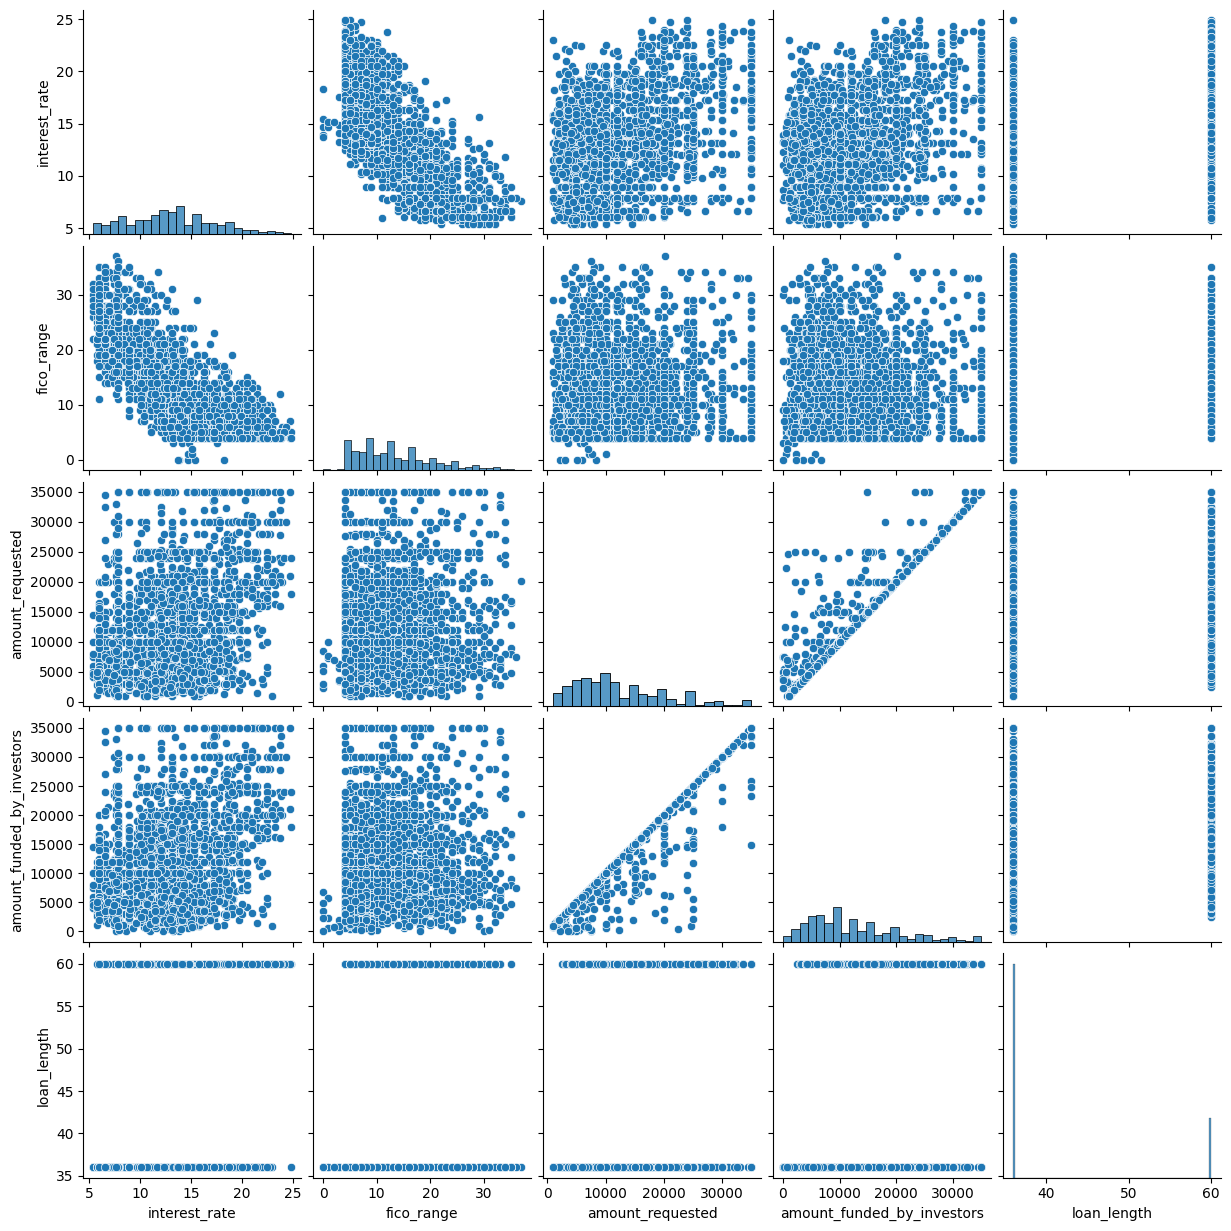

In [ ]:
sns.pairplot(df)

#### Notes to scatter matrix

Most Noticable = Interest_rate w/ Amount funded by investors, amount requested.
6/16 shown to have a flat relationship 

#### Project Direction

Loan - Target to explores: 
X = Amount_requested, interest_rate, fico_range
y = loan_length

Investing/Brokerage
X = amount_funded_by_investors, fico_range
y = 


In [ ]:
df.columns

Index(['interest_rate', 'fico_range', 'amount_requested',
       'amount_funded_by_investors', 'loan_length'],
      dtype='object')

In [ ]:
fico_categories = df['fico_range'].sort_values().unique().tolist()

In [ ]:
len(fico_categories)

38

In [ ]:
y_preds = lin_model.predict(X)
y_residuals = y - y_preds

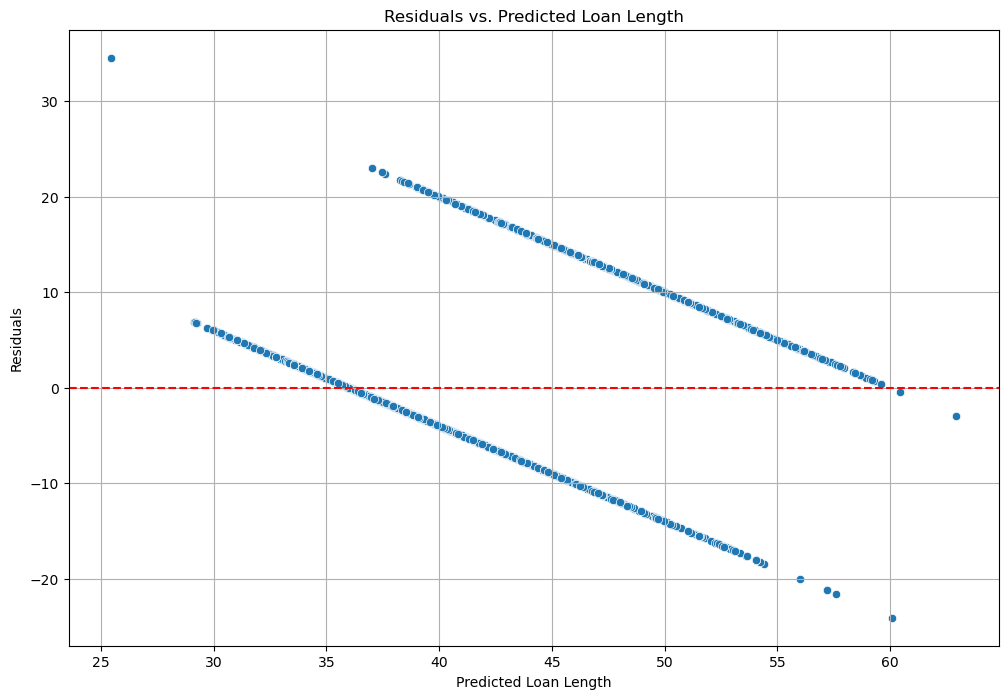

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x=y_preds, y=y_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Loan Length')
plt.xlabel('Predicted Loan Length')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### 1. Project Objective
Clearly state the purpose of your analysis:

1. What business question were you trying to answer?
- - **What is the target audience for the ROI on their loan?**
2. What patterns or drivers of loan interest rates were you investigating?
3. Why does this question matter to business owners applying for loans?

### 2. Data Overview
Provide a clear, high-level summary of the dataset:

1. Which variables were most relevant to understanding loan rates or predicting loan outcomes?

### 3. Exploratory Insights
Show the key findings that emerged during your exploratory analysis:

1. Which features showed the strongest relationships or predictive potential?
2. Visualizations should highlight meaningful relationships, patterns, or trends.

### 4. Modeling Approach
Summarize the steps your modeling approach:

1. Which features ended up being most influential in the model's predictions?
2. How well did the model perform (use intuitive metrics or visuals)?

### 5. Key Results and Recommendations
End with a clear, decision-oriented summary:

1. What practical guidance could you give new business owners based on your results?